In [14]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

In [17]:
df=pd.read_csv("NFLX.csv")
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,13-07-2020,567.979980,575.369995,520.960022,525.500000,525.500000,18399000
1,14-07-2020,517.080017,525.500000,490.489990,524.880005,524.880005,15083300
2,15-07-2020,516.299988,529.000000,510.179993,523.260010,523.260010,10066700
3,16-07-2020,526.479980,535.539978,504.359985,527.390015,527.390015,24499000
4,17-07-2020,494.869995,503.589996,484.140015,492.989990,492.989990,24991400


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

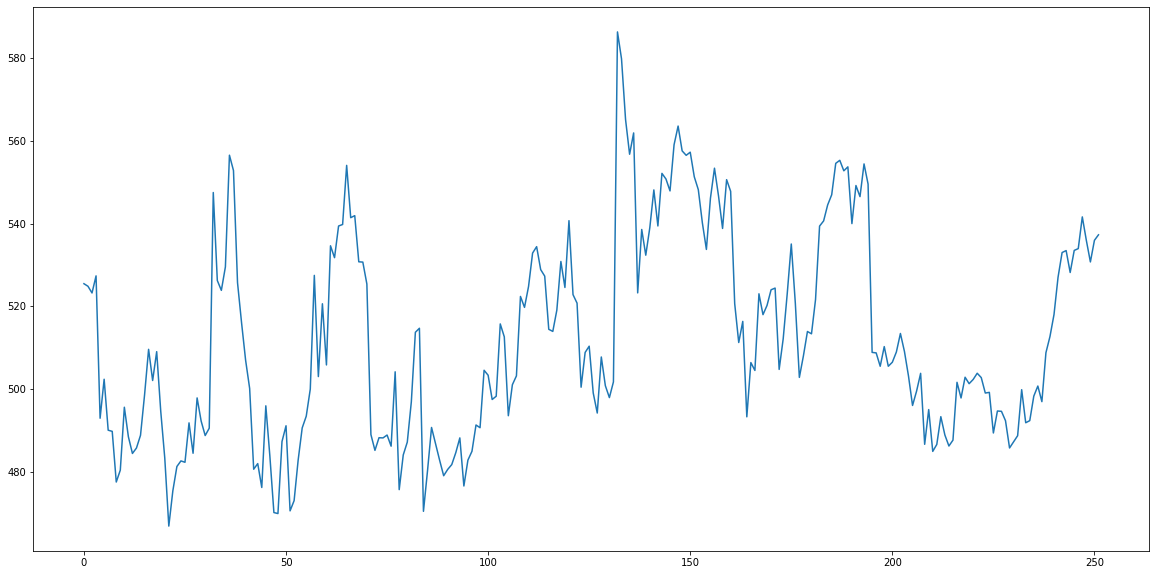

In [22]:
plt.figure()
plt.plot(df["Close"],label='Close Price history')

In [34]:
from datetime import datetime
import pandas_datareader.data as web

end = datetime.now()
start = datetime(end.year-1, end.month,end.day)

web

<module 'pandas_datareader.data' from 'c:\\users\\office\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\pandas_datareader\\data.py'>

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [37]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,512.635516,519.686944,504.960438,512.299484,512.299484,5.140693e+06
std,24.907591,25.144687,23.999961,24.742494,24.742494,3.780276e+06
min,467.690002,477.000000,458.600006,466.929993,466.929993,1.144000e+06
25%,492.235001,497.939995,485.525009,491.742493,491.742493,3.187825e+06
50%,507.330002,514.184998,500.524994,507.404999,507.404999,4.111850e+06
75%,532.149994,538.654984,524.252518,531.099991,531.099991,5.488550e+06
max,582.450012,593.289978,570.400024,586.340027,586.340027,3.263750e+07


<AxesSubplot:>

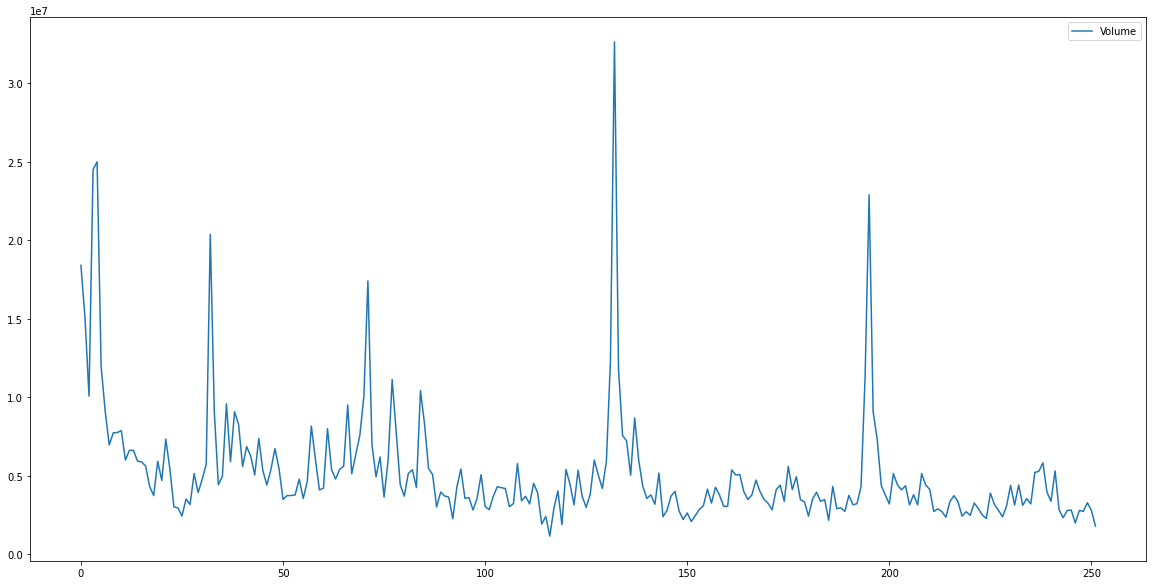

In [40]:
df['Volume'].plot(legend=True)

In [43]:
!pip install seaborn
import seaborn as sns

sns.set_style('whitegrid')

In [50]:
df['w'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
print(df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  13-07-2020  567.979980  575.369995  520.960022  525.500000  525.500000   
1  14-07-2020  517.080017  525.500000  490.489990  524.880005  524.880005   
2  15-07-2020  516.299988  529.000000  510.179993  523.260010  523.260010   
3  16-07-2020  526.479980  535.539978  504.359985  527.390015  527.390015   
4  17-07-2020  494.869995  503.589996  484.140015  492.989990  492.989990   

     Volume           w  
0  18399000  525.500000  
1  15083300  525.190002  
2  10066700  524.546672  
3  24499000  525.257507  
4  24991400  518.804004  


<AxesSubplot:>

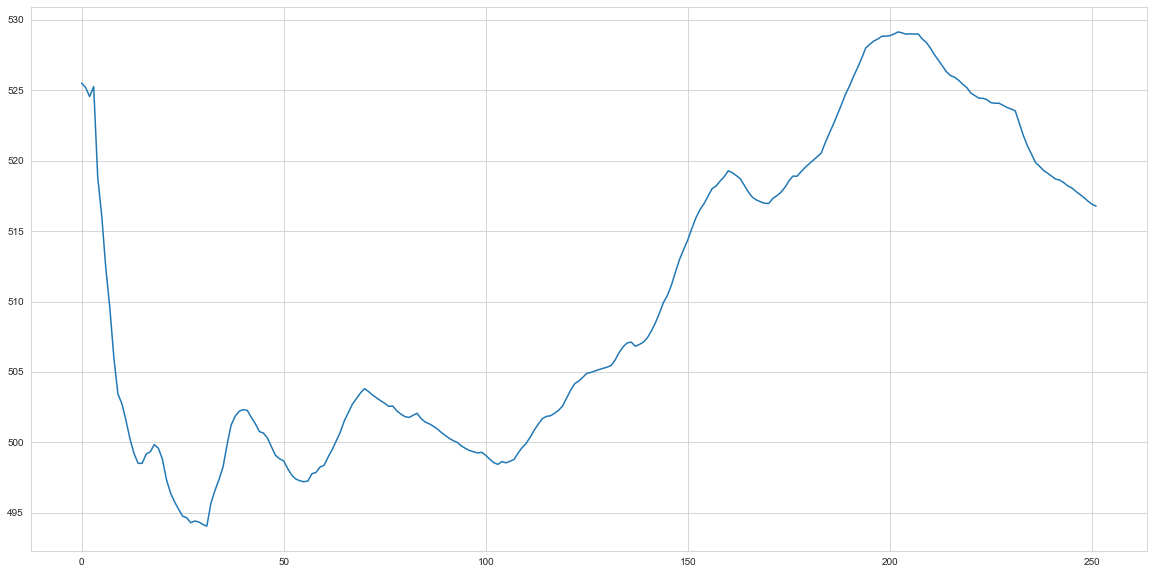

In [52]:
df['w'].plot()

In [53]:
df['d']=df['Adj Close'].pct_change()
df['d'].plot

c:\users\office\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='d', ylabel='Density'>

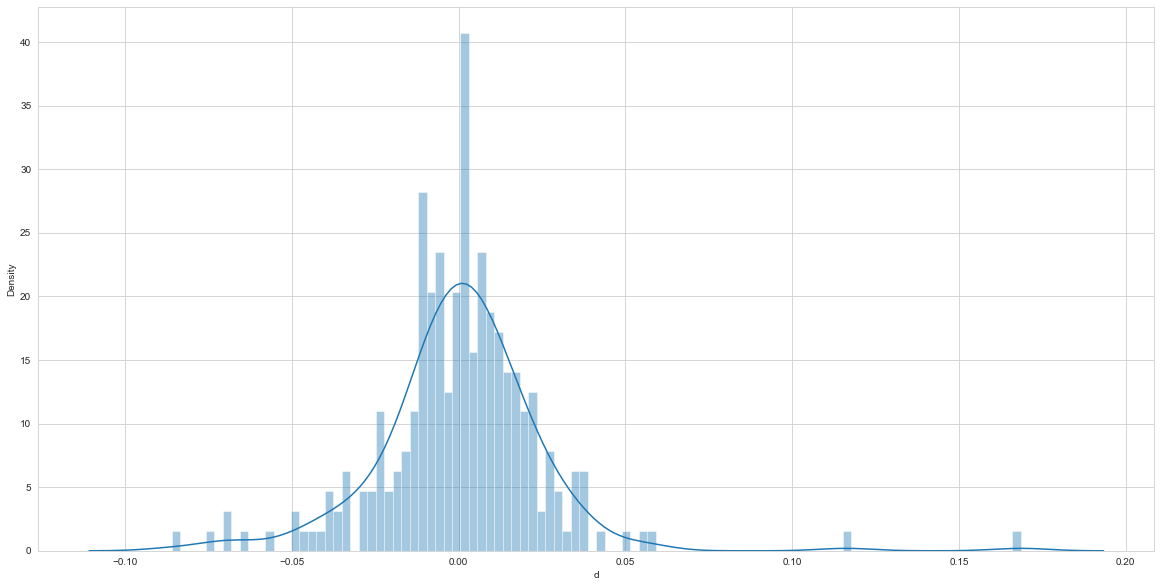

In [54]:
sns.distplot(df['d'].dropna(), bins=100)